In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.sample(5)

,Survived,Age,Fare
36,1,NaN,7.2292
465,0,38.0,7.0500
660,1,50.0,133.6500
529,0,23.0,11.5000
66,1,29.0,10.5000


In [ ]:
 df.shape

(714, 3)

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head(1)

,Age,Fare
328,31.0,20.525


In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6345266040688575

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans')

In [ ]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [ ]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [ ]:
trf.named_transformers_['first'].n_bins_

array([15])

In [ ]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      ,  5.27754049, 11.74158654, 17.35243056, 21.55720029,
              26.64837093, 32.14464286, 37.41916667, 42.9025    , 48.1075    ,
              53.110625  , 58.090625  , 62.3875    , 67.72916667, 75.54166667,
              80.        ])                                                   ],
      dtype=object)

In [ ]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [ ]:
output['age_labels'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [ ]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
523,44.0,8.0,57.9792,5.0,"(42.902, 48.108]","(45.738, 59.337]"
116,70.5,13.0,7.7500,0.0,"(67.729, 75.542]","(0.0, 11.241]"
248,37.0,6.0,52.5542,5.0,"(32.145, 37.419]","(45.738, 59.337]"
607,27.0,5.0,30.5000,3.0,"(26.648, 32.145]","(28.065, 34.909]"
325,36.0,6.0,135.6333,10.0,"(32.145, 37.419]","(123.564, 144.756]"


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [ ]:
accuracy_score(y_test,y_pred2)

0.6433566433566433

In [ ]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6556142410015648

In [ ]:
def discretize(bins,strategy):
  kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  trf = ColumnTransformer([
      ('first',kbin_age,[0]),
      ('second',kbin_fare,[1])
  ])
  X_trf = trf.fit_transform(X)
  print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy')))

  plt.figure(figsize=(14,10))
  plt.subplot(121)
  plt.hist(X['Age'])
  plt.title('Before Discretization')
  plt.subplot(122)
  plt.hist(X_trf[:,0],color='red')
  plt.title('After Discretization')
  plt.show()

  plt.figure(figsize=(14,10))
  plt.subplot(121)
  plt.hist(X['Fare'])
  plt.title('Before Discretization')
  plt.subplot(122)
  plt.hist(X_trf[:,1],color='red')
  plt.title('After Discretization')
  plt.show()

0.6864632237871675


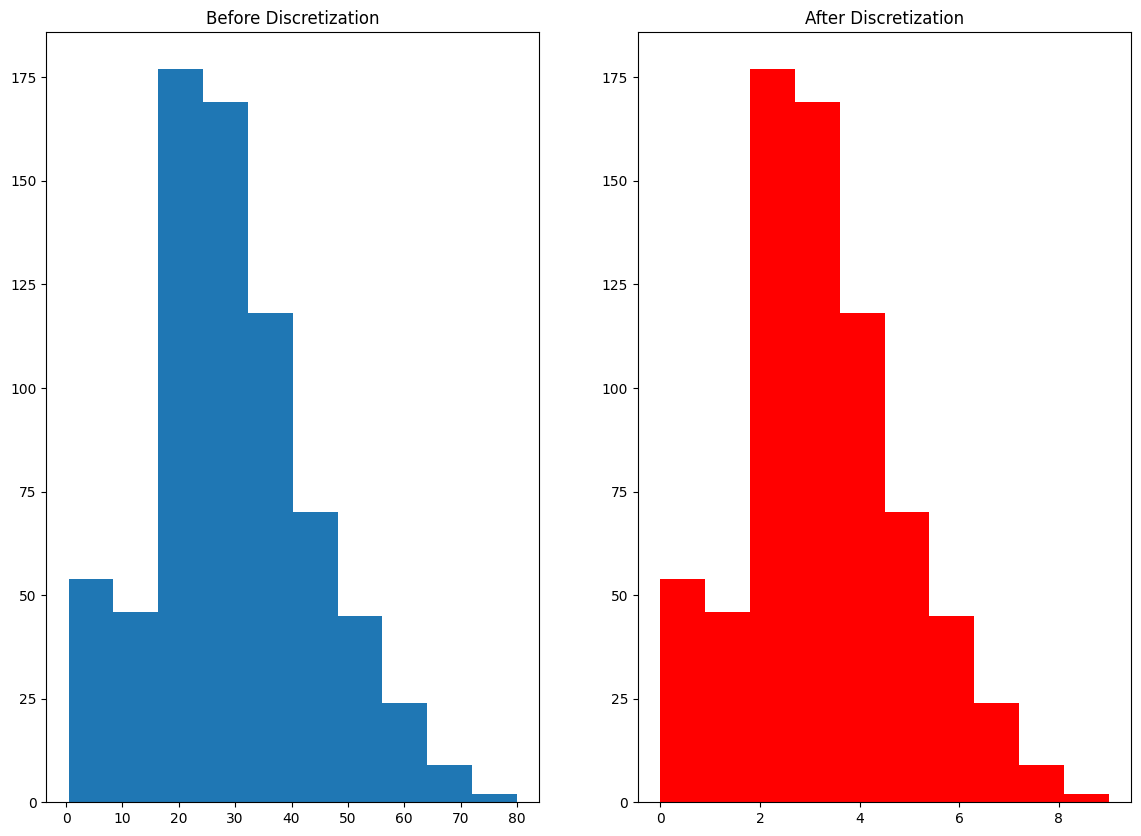

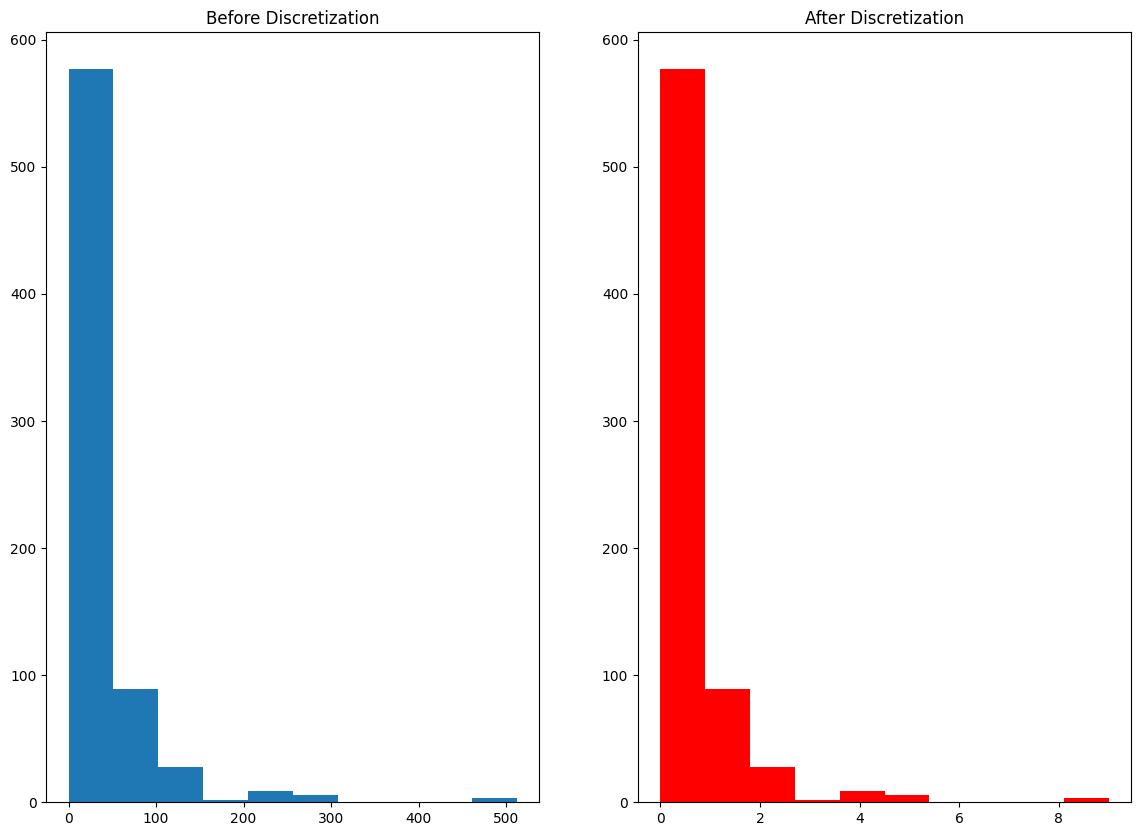

In [ ]:
discretize(10,'uniform')